# **AP157 Image Processing Lab Assignment**
### Module B2: Fourier Transform Applications in Image Processing

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Chris Andrew\
_Student No._: 2019-02636 \
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: April 18, 2024 (11:59 PM)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Chris Andrew Mendoza

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/20
* Part 3 - []/20
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

from numpy.fft import fft2,ifft2,fftshift,ifftshift
import random

import cv2

#### PART 1 - Apply 2D FFT on simple apertures *(30 points)*

1. [15 pts.] Rectangular apertures with (width, height):
- (50, 20) pixels
- (20, 50) pixels
2. [15 pts.] Circular apertures with radii:
- 5 pixels
- 10 pixels
- 20 pixels

For each aperture type, perform the following steps:

- **Step 1: Define Input Aperture**
  - Generate a 2D array representing a rectangle/circle with the specified size within a square grid of size 128 pixels (representing an optical system, for example).
  
- **Step 2: Compute Fourier Transform**
  - Use the Fast Fourier Transform (FFT) algorithm to compute the Fourier transform of the input aperture.

- **Step 3: Shift the FFT**
  - Shift the zero frequency component of the Fourier transform to the center.

- **Step 4: Visualization (Plotting)**
  - Plot the original aperture.
  - Plot the magnitude of the shifted Fourier transform.
  - Plot the log-scaled magnitude of the shifted Fourier transform.
  - Add colorbars to the plots for reference.

- **Step 5: Display**
  - Display the plots in a single figure with three subplots (original aperture, FFT magnitude, log-scaled FFT magnitude).



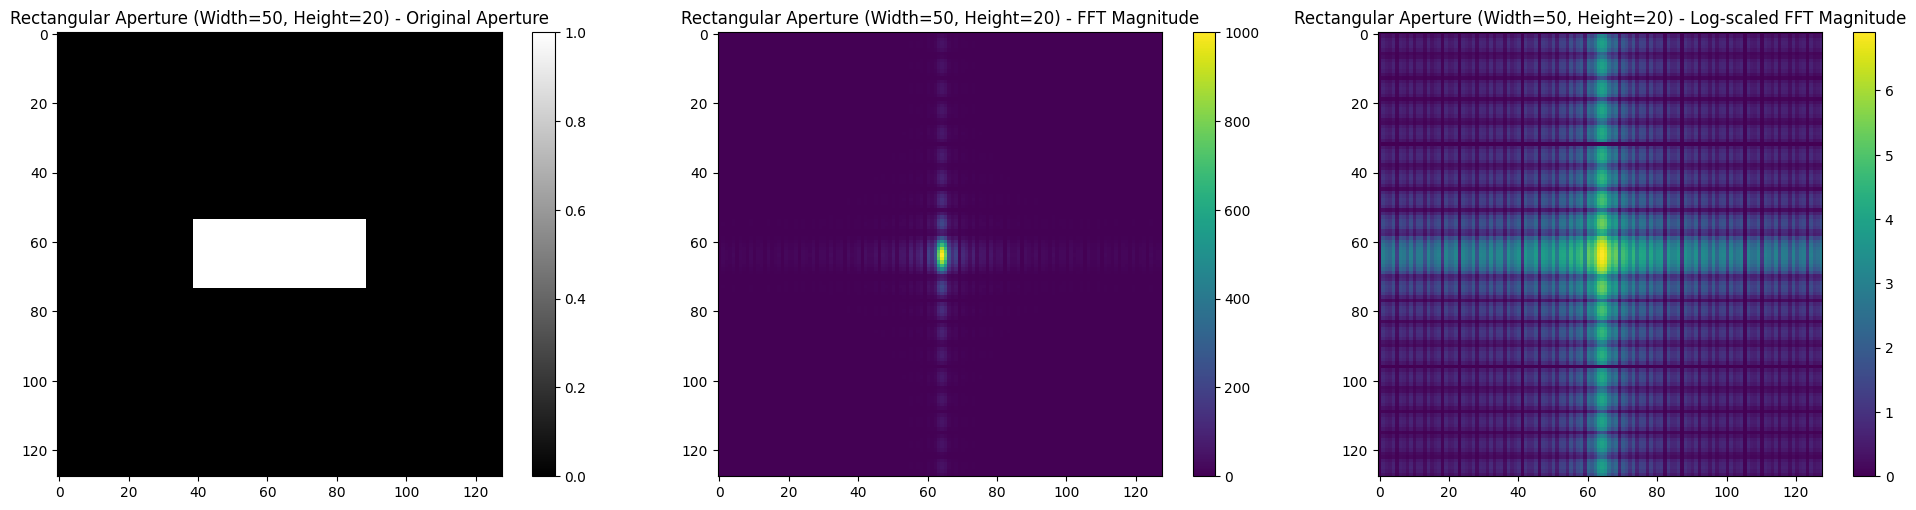

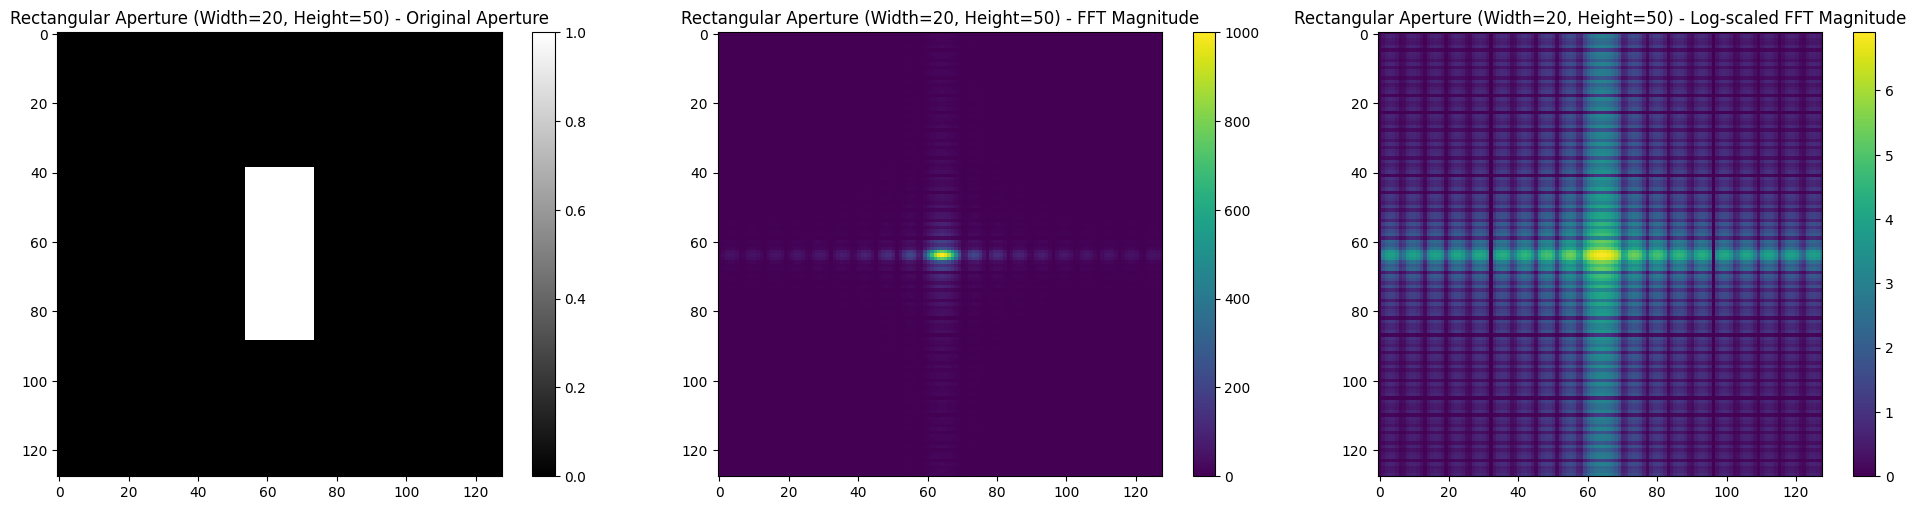

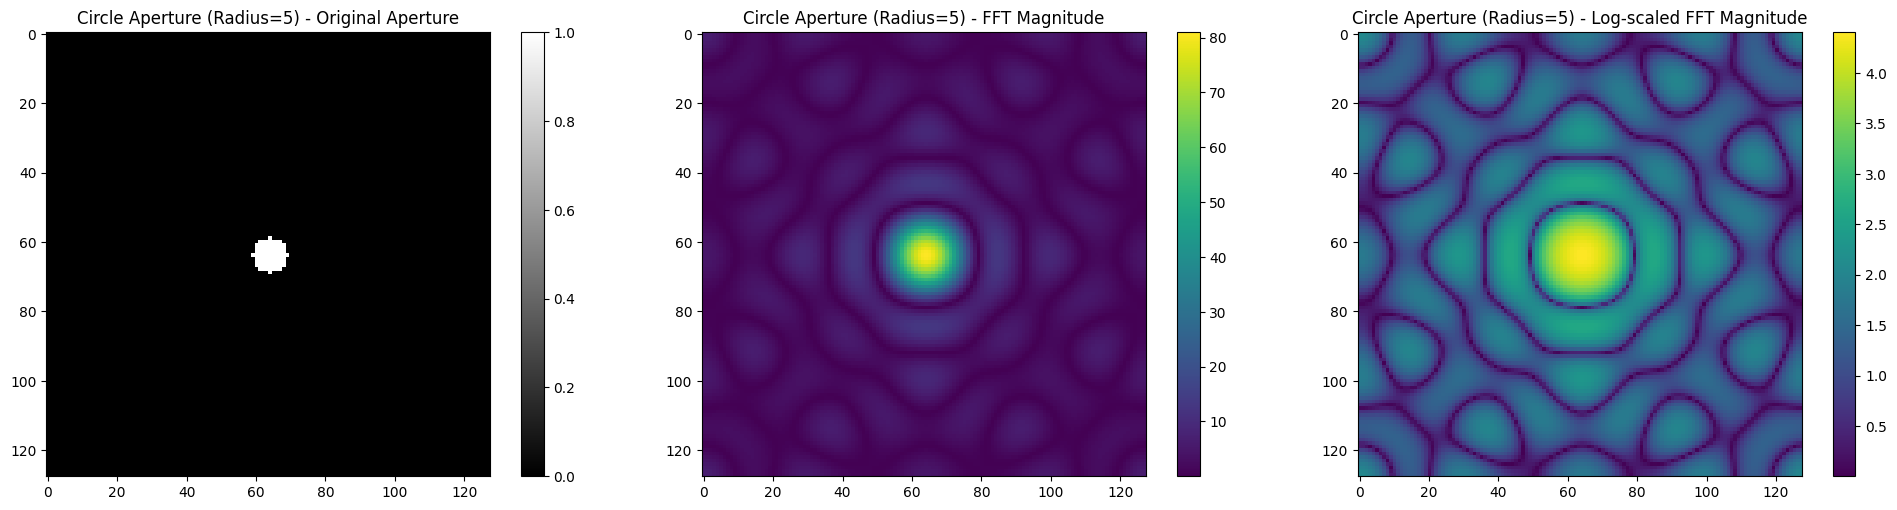

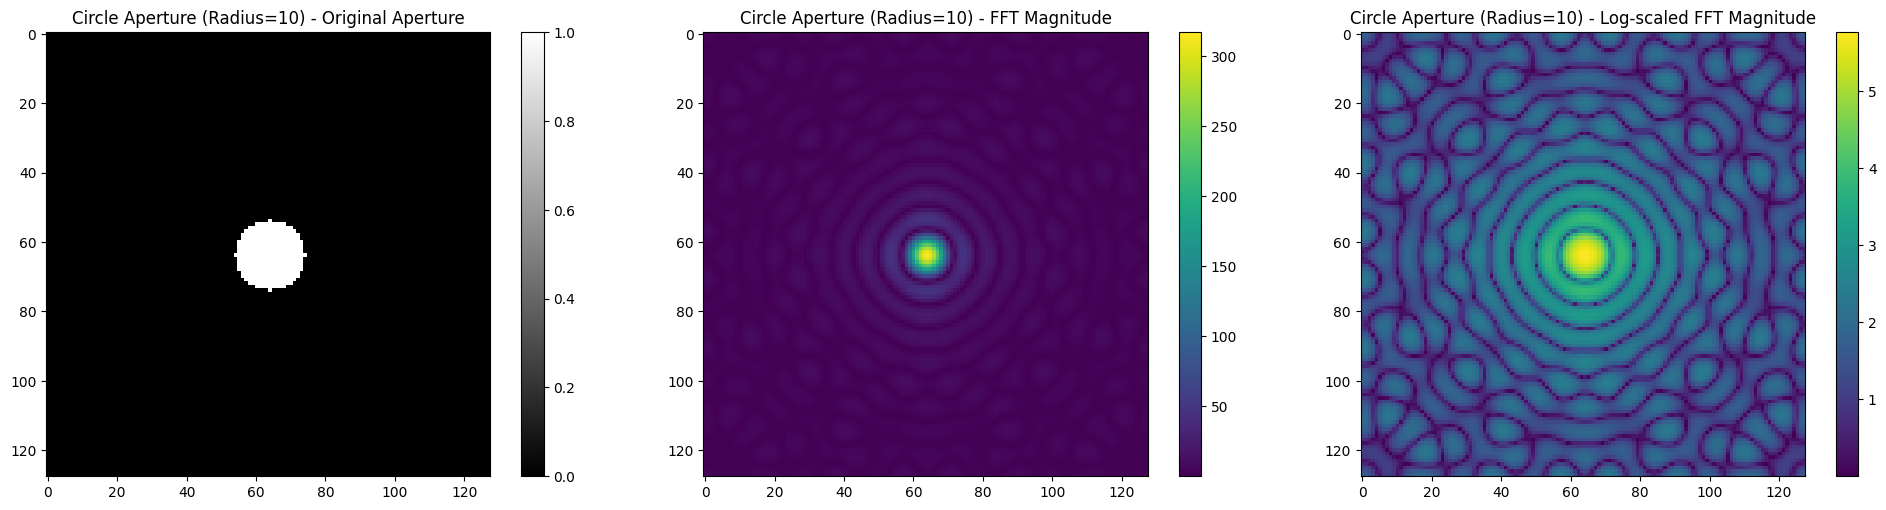

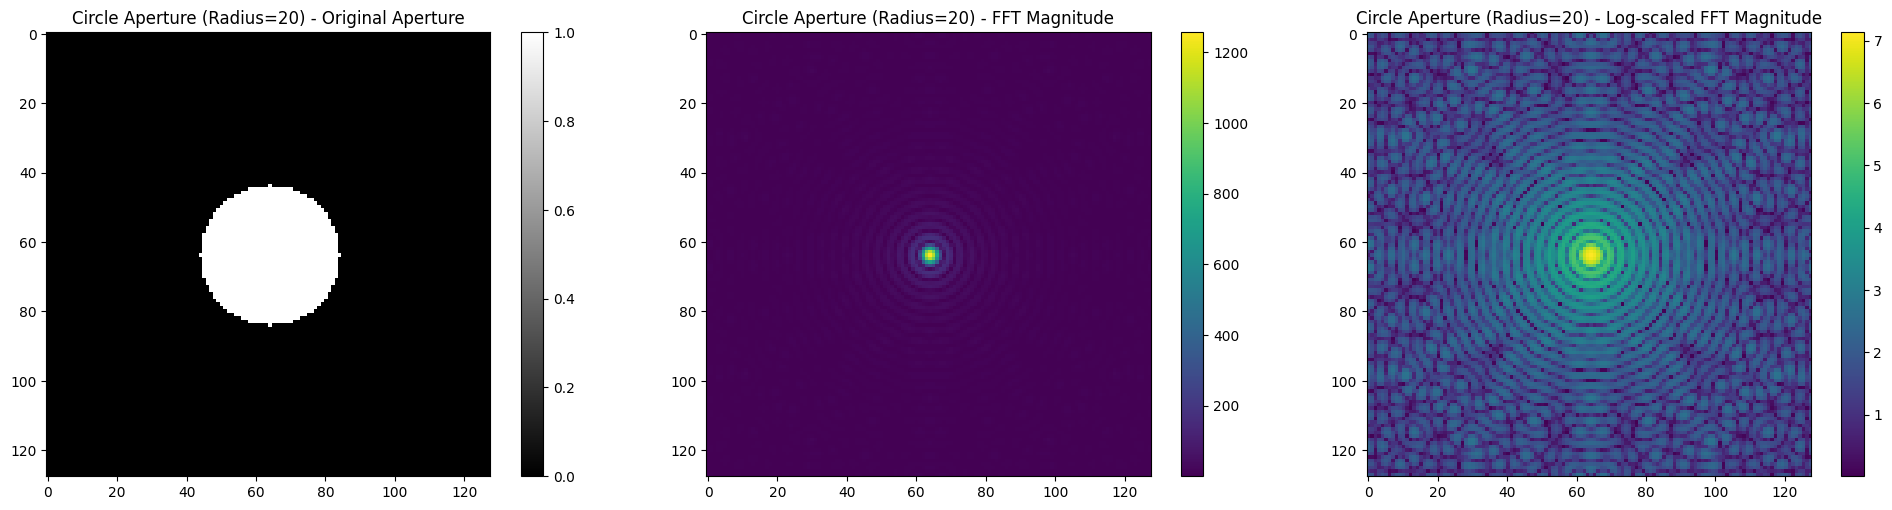

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define Input Aperture
def rectangular_aperture(width, height, grid_size):
    aperture = np.zeros((grid_size, grid_size))
    x_start = (grid_size - width) // 2
    y_start = (grid_size - height) // 2
    aperture[y_start:y_start+height, x_start:x_start+width] = 1
    return aperture

def circular_aperture(radius, grid_size):
    y, x = np.ogrid[-grid_size/2:grid_size/2, -grid_size/2:grid_size/2]
    mask = x**2 + y**2 <= radius**2
    aperture = np.zeros((grid_size, grid_size))
    aperture[mask] = 1
    return aperture

# Step 2: Compute Fourier Transform
def compute_fft(aperture):
    fft = np.fft.fft2(aperture)
    return np.fft.fftshift(fft)

# Step 4: Visualization (Plotting)
def plot_results(aperture, fft_magnitude, title):
    plt.imshow(aperture, cmap='gray')
    plt.title(title + ' - Original Aperture')
    plt.colorbar()

def plot_fft_magnitude(fft_magnitude, title):
    plt.imshow(np.abs(fft_magnitude), cmap='viridis')
    plt.title(title + ' - FFT Magnitude')
    plt.colorbar()

def plot_log_fft_magnitude(fft_magnitude, title):
    plt.imshow(np.log(np.abs(fft_magnitude) + 1), cmap='viridis')
    plt.title(title + ' - Log-scaled FFT Magnitude')
    plt.colorbar()

# Step 5: Display
def display_results(aperture, fft_magnitude, title):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plot_results(aperture, fft_magnitude, title)
    plt.subplot(1, 3, 2)
    plot_fft_magnitude(fft_magnitude, title)
    plt.subplot(1, 3, 3)
    plot_log_fft_magnitude(fft_magnitude, title)
    plt.tight_layout()
    plt.show()

# Rectangular apertures
grid_size = 128
width_height_pairs = [(50, 20), (20, 50)]
for width, height in width_height_pairs:
    aperture = rectangular_aperture(width, height, grid_size)
    fft = compute_fft(aperture)
    display_results(aperture, fft, f'Rectangular Aperture (Width={width}, Height={height})')

# Circular apertures
radii = [5, 10, 20]
for radius in radii:
    aperture = circular_aperture(radius, grid_size)
    fft = compute_fft(aperture)
    display_results(aperture, fft, f'Circle Aperture (Radius={radius})')

# **DISCUSSION**

For the rectangular apertures, it can be observed that airy patterns extend along the sides of the rectangles. Most notably, the pattern is more prominent towards the longer sides of the rectanlges and looks fainter in the direction towards the shorter sides. This is due to the anamorphic property of the FFT of the images [1]. A longer length in the spatial dimension corresponds to a more compact representation in the spatial frequency dimension.

Notice that in the Log FFT plot, we can also view the smaller amplitudes in great detail. These small amplitudes are affected by numerical round-off error, hence we cannot see them in the plain FFT plot [2].

For the circular apertures, the same anamorphic property can be observed. As the radius of the apertures become larger, the spatial frequency diminishes. The central bright spot becomes smaller. Taking the log of the FFT, we can see that amplitudes indeed become smaller as the aperture radius is increased.
Source(s):
[1]https://clearlyconfusedcarlo.wordpress.com/2016/09/29/activity-6-properties-and-applications-of-the-2d-fourier-transform/
[2] https://www.mathworks.com/help/matlab/math/two-dimensional-fft.html

#### PART 2 - Convolution *(20 points)*

Now that we've shown that FT acts as if an imaging system, suppose we have an image and convolve it with a circular aperture with different radii. Assuming that the circular aperture is a camera lens, we want to show how the reconstruction of the original image can be limited by the properties of the camera lens (or any imaging device) such as aperture size.

Take the astronaut image from skimage and convolve it with circular apertures of radii: 8, 32, and 64 pixels.

To do this, you can perform the ff. steps:

- **Compute Fourier Transform of Image:**
  - Use `fft2` to compute the 2D Fourier Transform of the input image.
  
- **Compute Fourier Transform of Aperture:**
  - Use `fftshift` to shift the zero-frequency component to the center.

- **Perform Element-wise Multiplication in Frequency Domain:**
  - Multiply the Fourier Transform of the image and the shifted aperture element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the product from the previous step.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the aperture, and the convolution result.

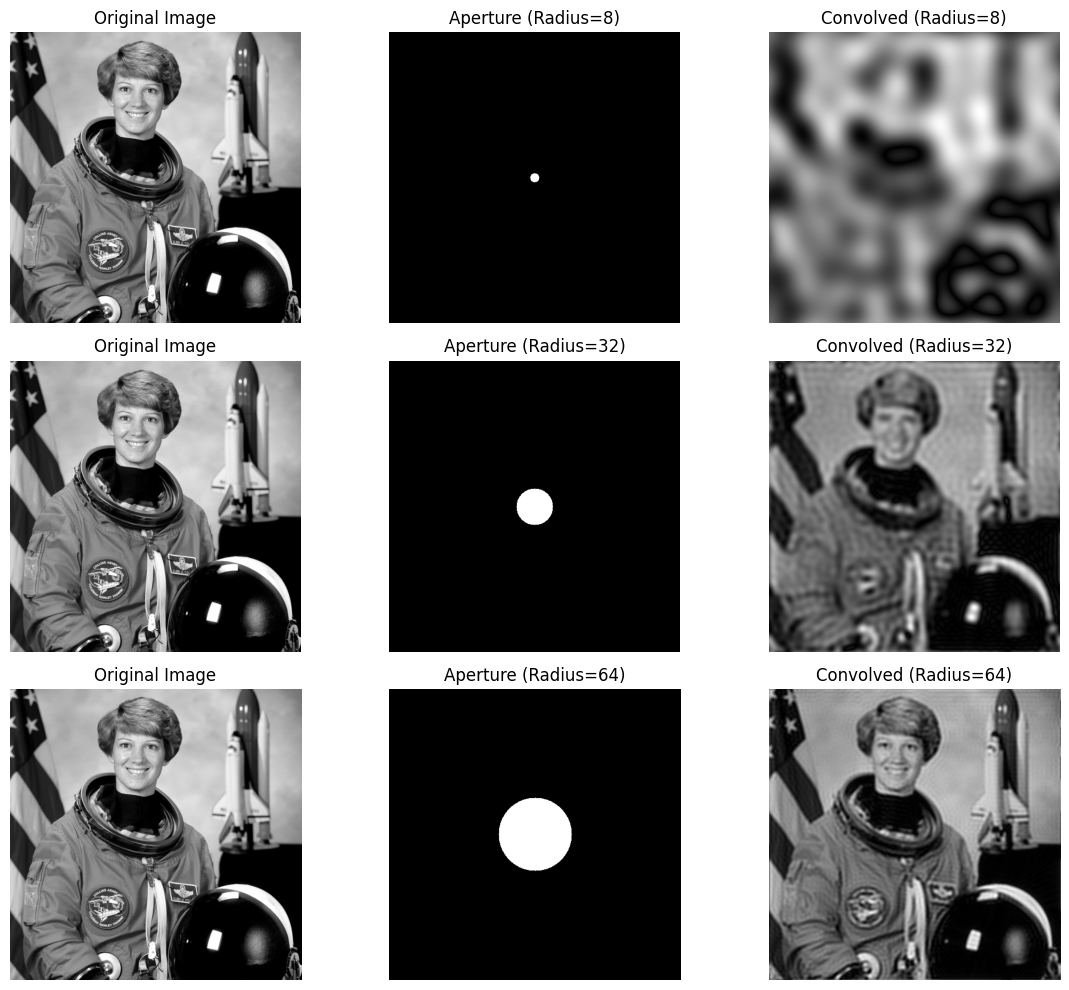

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy import fftpack

# Load the astronaut image and convert to grayscale
image = color.rgb2gray(data.astronaut())

# Define circular aperture function
def circular_aperture(radius, grid_size):
    y, x = np.ogrid[-grid_size/2:grid_size/2, -grid_size/2:grid_size/2]
    mask = x**2 + y**2 <= radius**2
    aperture = np.zeros((grid_size, grid_size))
    aperture[mask] = 1
    return aperture

# Compute Fourier Transform of Image
image_fft = fftpack.fft2(image)

# Define circular apertures radii
radii = [8, 32, 64]
grid_size = image.shape[0]

# Create figure with subplots
fig, axes = plt.subplots(len(radii), 3, figsize=(12, 10))

# Plot original image in the first column for all rows
for i, radius in enumerate(radii):
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

# Iterate through circular apertures
for i, radius in enumerate(radii):
    # Compute Fourier Transform of Aperture
    aperture = circular_aperture(radius, grid_size)
    aperture_fft = fftpack.fftshift(aperture)

    # Perform Element-wise Multiplication in Frequency Domain
    convolved_fft = image_fft * aperture_fft

    # Compute Inverse Fourier Transform
    convolved_image = np.abs(fftpack.ifft2(convolved_fft))

    # Plot circular aperture
    axes[i, 1].imshow(aperture, cmap='gray')
    axes[i, 1].set_title(f'Aperture (Radius={radius})')
    axes[i, 1].axis('off')

    # Plot convolution result
    axes[i, 2].imshow(convolved_image, cmap='gray')
    axes[i, 2].set_title(f'Convolved (Radius={radius})')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


# **DISCUSSION**

Based on the results, it can be assumed that utilizing larger aperture radius for convolution produces a more desirable result. The larger aperture results in a smoother effect and preserves more detail and reduces noise. The Fourier transform of the convolution of two functions in the spatial domain is equal to the product in the frequency domain of the Fourier transforms of the two functions. It is a “smearing” of one function against another, such that the resulting function h looks a little like both f and g.

#### PART 3 - Correlation *(20 points)*

In this task, we observe using the correlation method that the similarity between two functions can be extracted-- this is also referred to as template matching.

You can get the test and target images from the "Datasets" folder in the course GDrive:
- AP157_moduleB2_correlation_test_image.png (with text "The Rain in Spain Stays Mainly in the Plain")
- AP157_moduleB2_correlation_target_image.png (with text "A")

In the correlation result, the high intensity portions indicate the presence of letter 'A' on the test image.

To get the correlation, you can perform the ff. steps:

- **Compute Fourier Transforms:**
  - Use `fft2` to compute the 2D Fourier Transform of the input test image (`image`).
  - Use `fft2` and `np.conj` to compute the complex conjugate of the 2D Fourier Transform of the target template.

- **Compute Cross-Correlation in Frequency Domain:**
  - Multiply the Fourier Transforms of the image and the complex conjugate of the Fourier Transform of the target template element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the correlation.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the target image, and the correlation result.
  - Add colorbars to each subplot for reference and to visualize intensity levels.

In [55]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [56]:
!ls drive/My\ Drive

 1080652.jpg
'132 PROB SETS'
'151 Problem Set 1.pdf'
'165 Camera Setup'
'167 Activity 6: Color Science '
'170 Problem Set 1.pdf'
 184
 184_act_1
 191_Data
'191 Set A'
'191 - SET C EXPERIMENTS'
'192 Exp 2'
'192 Experiment 3'
'192 Experiment 3 (New Data)'
 192_SetB_Exp3.xlsx
'192 Set B - Experiment 3.gsheet'
 192_SetC_Experiment_1.gsheet
 20210709_190543.jpg
 20210709_190732.jpg
 20210713_010723.jpg
 20210724_020633.jpg
 20220503_174636.jpg
 20220503_175058.jpg
 20230126_102907.jpg
 20230227_170223.jpg
 20230227_170245.jpg
 20230315_170009.jpg
 20230606_233247.jpg
 20230607_173628.jpg
 20230719_204157.jpg
 20230719_204250.jpg
 20230719_205910.mp4
 20230719_210316.jpg
 20230719_210317.jpg
 20230719_211938.mp4
 20230719_213138.mp4
 20230719_214628.mp4
 20230719_223236.jpg
 20230725_201704.jpg
 20230725_201745.jpg
 20230725_201807.jpg
 20230725_202037.jpg
 20230725_202114.jpg
 20230726_150843.jpg
 20230726_150903.jpg
 20230727_155604.jpg
 20230727_155849.jpg
 20230727_155901.jpg
 20230727_1

In [57]:
file_path = "/content/drive/My Drive/App Physics 157/"

In [58]:
test_img = cv2.imread(file_path + 'AP157_moduleB2_correlation_test_image.png')
target_img = cv2.imread(file_path + 'AP157_moduleB2_correlation_target_image.png')

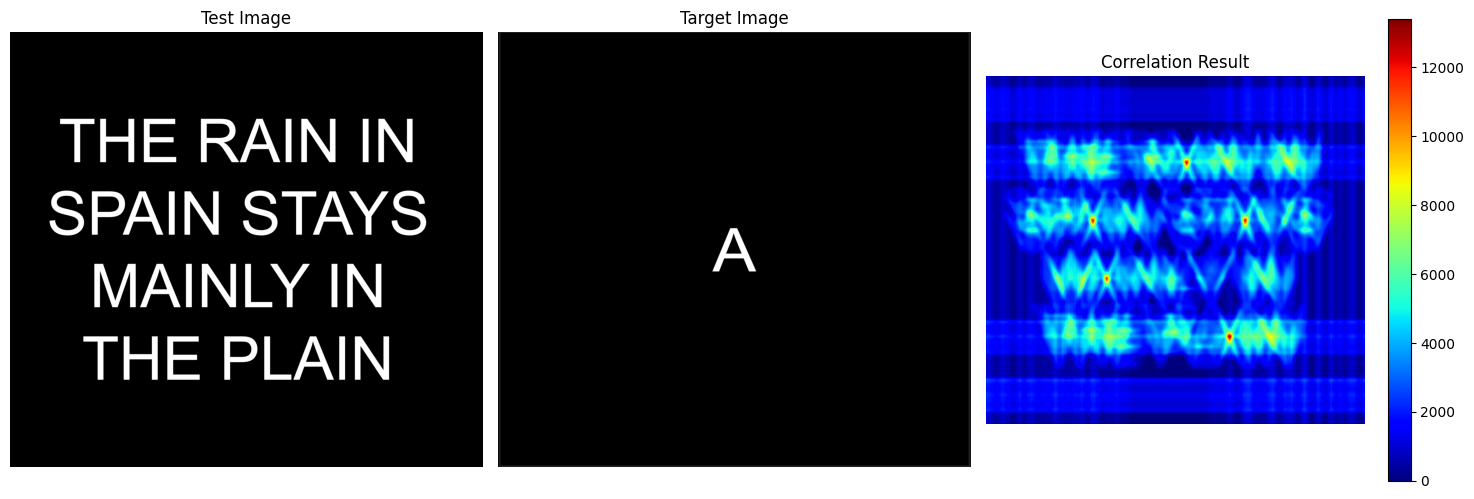

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, transform
from scipy import fftpack

# Convert images to grayscale
test_image = color.rgb2gray(test_img)
target_image = color.rgb2gray(target_img)

# Resize target image to match the dimensions of the test image
target_image_resized = transform.resize(target_image, test_image.shape)

# Compute Fourier Transforms
test_fft = fftpack.fft2(test_image)
target_fft_conj = np.conj(fftpack.fft2(target_image_resized))

# Compute Cross-Correlation in Frequency Domain
correlation_fft = test_fft * target_fft_conj

# Compute Inverse Fourier Transform
correlation_result = np.abs(fftpack.fftshift(fftpack.ifft2(correlation_fft)))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original test image
axes[0].imshow(test_image, cmap='gray')
axes[0].set_title('Test Image')
axes[0].axis('off')

# Plot target image
axes[1].imshow(target_image_resized, cmap='gray')
axes[1].set_title('Target Image')
axes[1].axis('off')

# Plot correlation result
im = axes[2].imshow(correlation_result, cmap='jet')
axes[2].set_title('Correlation Result')
axes[2].axis('off')
fig.colorbar(im, ax=axes[2])

plt.tight_layout()
plt.show()


# **DISCUSSION**

Here, we see that the bright spots on the Correlation Result corresppond to the locations where there is a lette 'A' in the original text. The way correlation works is that it figures out how similar 2 functions are. If the correlation of 2 fucntions f and g is P, P is then just the inverse FT of the product of the FT of g and the conjugate of the FT of f. Now, how does this work in actually finding the spots where there is a letter 'A', for example? When comparing the 2 fucntions/signals, there will be areas where the correlation value is greater when the 2 functions are identical. These are the areas where we see the bright spots on the Correlation Result.

#### PART 4 - Application: Canvas Weave Modeling and Removal *(30 points)*

Suppose we want to investigate the brush strokes of a painter. However, the texture of the canvas obscures our view of the brushstrokes. Let’s use FFT to remove the canvas weave.

Perform the ff. steps:

1. Open the image AP157_moduleB_canvas_weave_image.jpg (also in the Datasets folder; the image is from a painting by Dr. Vincent Daria.) and convert into a grayscale image. To enhance the detection of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images.

2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.

3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks. Take the inverse FT of the filtered FT and overlay the filtered R,G,B images. Did the canvas weave vanish enough that the paint and brushstrokes remain?

4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Observe the generated modulus image. Is it close to the appearance of the canvas weave?

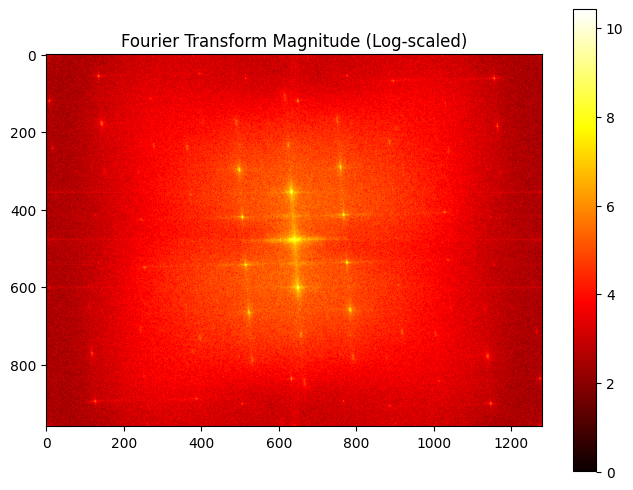

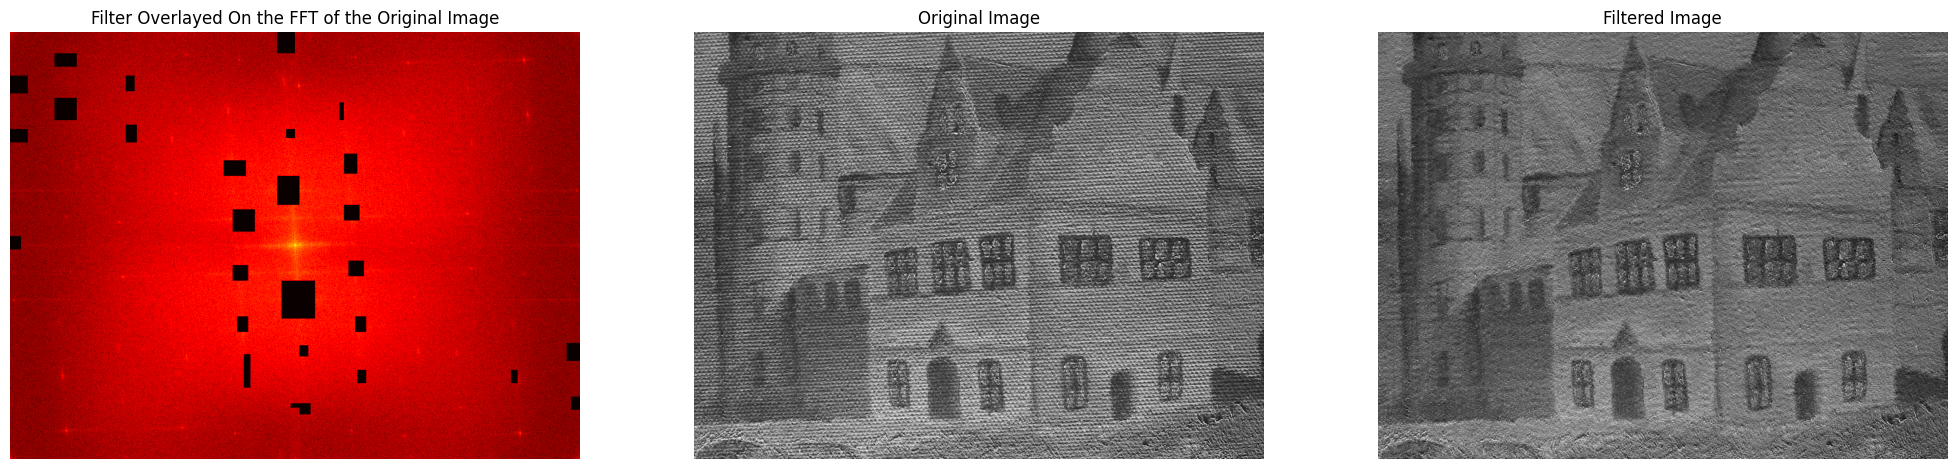

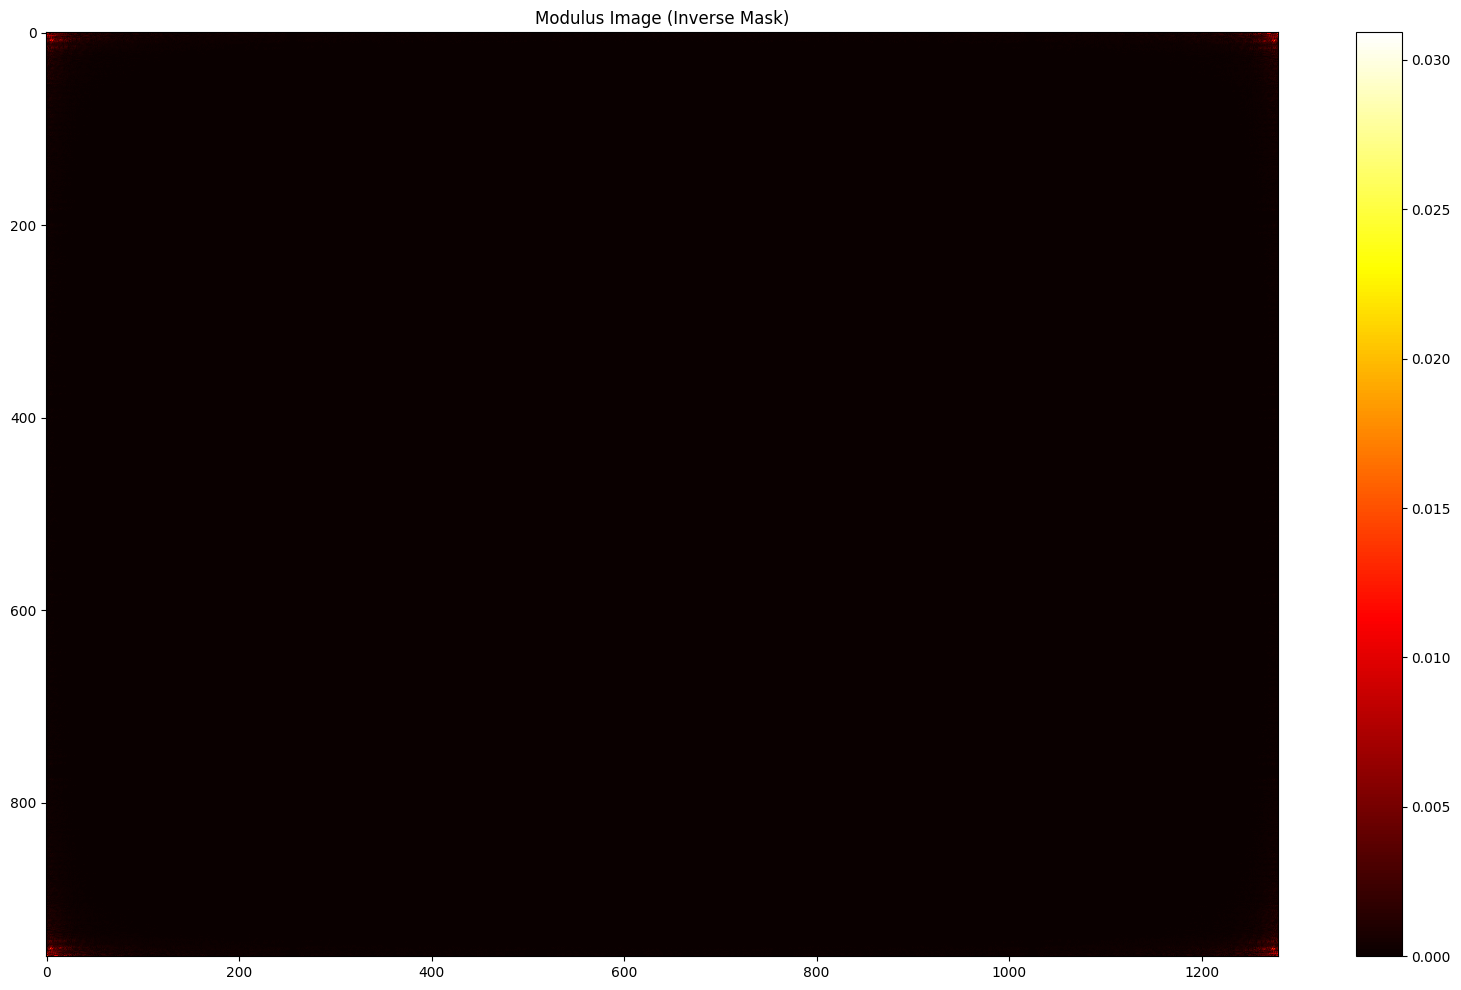

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import find_peaks

# Load the image and convert to grayscale
file_path = "/content/drive/My Drive/App Physics 157/"
image = cv2.imread(file_path + "AP157_moduleB2_canvas_weave_image.jpg")
gray_image = color.rgb2gray(image)

# Subtract the mean grayscale from the image
mean_subtracted_image = gray_image - np.mean(gray_image)

# Take the Fourier Transform of the mean-subtracted image
fft_image = np.fft.fft2(mean_subtracted_image)

# Plot the Fourier Transform magnitude
plt.figure(figsize=(8, 6))
plt.imshow(np.log(np.abs(fft_image_shifted) + 1), cmap='hot')
plt.title('Fourier Transform Magnitude (Log-scaled)')
plt.colorbar()
plt.show()

"""
# Compute the Fourier Transform Magnitude plot
fft_magnitude = np.log(np.abs(fft_image_shifted))

# Find peaks in the Fourier Transform Magnitude plot
peaks, _ = find_peaks(fft_magnitude.flatten(), height=7.5)

# Convert the flattened indices of peaks back to 2D indices
peak_rows, peak_cols = np.unravel_index(peaks, fft_magnitude.shape)

# Plot the Fourier Transform Magnitude plot
plt.imshow(np.log(fft_magnitude + 1), cmap='gray')
plt.title('Fourier Transform Magnitude (Log-scaled) with Peaks')
plt.colorbar()

# Plot the detected peaks
plt.plot(peak_cols, peak_rows, 'ro', markersize=5)"""

# Manually create a filter mask to remove canvas weave patterns
canvas_weave_filter = np.ones_like(fft_image_shifted)
# Manually identify and mark the peaks representing the canvas weave patterns
canvas_weave_filter[50:80, 100:150] = 0
canvas_weave_filter[150:200, 100:150] = 0
canvas_weave_filter[100:140, 0:40] = 0
canvas_weave_filter[220:250, 0:40] = 0
canvas_weave_filter[210:250, 260:285] = 0
canvas_weave_filter[100:135, 260:280] = 0
canvas_weave_filter[290:325, 480:530] = 0
canvas_weave_filter[400:450, 500:550] = 0
canvas_weave_filter[275:320, 750:780] = 0
canvas_weave_filter[325:390, 600:650] = 0
canvas_weave_filter[560:645, 610:685] = 0
canvas_weave_filter[390:425, 750:785] = 0
canvas_weave_filter[525:560, 500:535] = 0
canvas_weave_filter[515:550, 760:795] = 0
canvas_weave_filter[640:675, 510:535] = 0
canvas_weave_filter[640:675, 775:800] = 0
canvas_weave_filter[705:730, 650:670] = 0
canvas_weave_filter[725:800, 525:540] = 0
canvas_weave_filter[705:730, 650:670] = 0
canvas_weave_filter[760:790, 780:800] = 0
canvas_weave_filter[460:490, 0:25] = 0
canvas_weave_filter[0:50, 600:640] = 0
canvas_weave_filter[220:240, 620:640] = 0
canvas_weave_filter[835:845, 630:650] = 0
canvas_weave_filter[835:860, 650:675] = 0
canvas_weave_filter[160:200, 740:750] = 0
canvas_weave_filter[760:790, 1125:1140] = 0
canvas_weave_filter[820:850, 1260:1280] = 0
canvas_weave_filter[700:740, 1250:1280] = 0

# Multiply the filter with the shifted Fourier Transform
filtered_fft = np.fft.fftshift(np.fft.fft2(gray_image))*(canvas_weave_filter)

# Take the inverse Fourier Transform of the filtered FFT
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fft)))

# Plot the original and filtered images
plt.figure(figsize=(25, 15))
plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(filtered_fft) + 1), cmap='hot')
plt.title('Filter Overlayed On the FFT of the Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

# Invert the filter mask
canvas_weave_filter = np.zeros_like(fft_image_shifted)
canvas_weave_filter[50:80, 100:150] = 1
canvas_weave_filter[150:200, 100:150] = 1
canvas_weave_filter[100:140, 0:40] = 1
canvas_weave_filter[220:250, 0:40] = 1
canvas_weave_filter[210:250, 260:285] = 1
canvas_weave_filter[100:135, 260:280] = 1
canvas_weave_filter[290:325, 480:530] = 1
canvas_weave_filter[400:450, 500:550] = 1
canvas_weave_filter[275:320, 750:780] = 1
canvas_weave_filter[325:390, 600:650] = 1
canvas_weave_filter[560:645, 610:685] = 1
canvas_weave_filter[390:425, 750:785] = 1
canvas_weave_filter[525:560, 500:535] = 1
canvas_weave_filter[515:550, 760:795] = 1
canvas_weave_filter[640:675, 510:535] = 1
canvas_weave_filter[640:675, 775:800] = 1
canvas_weave_filter[705:730, 650:670] = 1
canvas_weave_filter[725:800, 525:540] = 1
canvas_weave_filter[705:730, 650:670] = 1
canvas_weave_filter[760:790, 780:800] = 1
canvas_weave_filter[460:490, 0:25] = 1
canvas_weave_filter[0:50, 600:640] = 1
canvas_weave_filter[220:240, 620:640] = 1
canvas_weave_filter[835:845, 630:650] = 1
canvas_weave_filter[835:860, 650:675] = 1
canvas_weave_filter[160:200, 740:750] = 1
canvas_weave_filter[760:790, 1125:1140] = 1
canvas_weave_filter[820:850, 1260:1280] = 1
canvas_weave_filter[700:740, 1250:1280] = 1
# Take the inverse Fourier Transform of the inverted filter
inverted_fft = np.fft.ifft2(np.fft.ifftshift(canvas_weave_filter))

# Plot the modulus of the inverted Fourier Transform
plt.figure(figsize=(20, 12))
plt.imshow(np.abs(inverted_fft), cmap='hot')
plt.title('Modulus Image (Inverse Mask)')
plt.colorbar()
plt.show()



# **DISCUSSION**
In order to remove the weave pattern from the original painting, it was first necesary to figure out what the FFT of a regular image would look like. A typical image when FFT is applied will generally have a bright center spot. No other bright spots can be found on the resulting plot. Hence, in order to "smoothen" the painting, it was necessary to manually filter out the other bright spots by setting their values to 0. This is showed on the "Filter Overlayed On the FFT of the Original Image" plot. This process removes the noise we get from the canvas weave and gives us a smooth and restored-looking filtered image.

If we take the mask/filter used and invert it (make the zeros into ones and the ones into zeros) and apply ifft2(), we get the weave pattern that was removed from the original image.